# Bibliotecas

In [19]:
import geopandas as gpd
from shapely.geometry import Polygon, Point, LineString, MultiPolygon
import  os
import  pandas as  pd

# Explorando funcionamento do shapely

<AxesSubplot:>

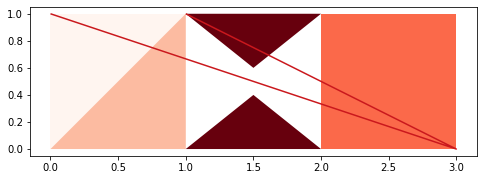

In [2]:
p1 = Polygon([(0,0),(1,0),(1,1),(0,1)])
p2 = Polygon([(0,0),(1,0),(1,1)])
p3 = Polygon([(2,0),(3,0),(3,1),(2,1)])

p4 = LineString([(0,1),(3,0),(1,1)])

p6=Polygon([(1,0),(1.5,0.4),(2,0)])
p7=Polygon([(1,1),(1.5,0.6),(2,1)])

p8=MultiPolygon([p6,p7])
g = gpd.GeoSeries([p1,p2,p3,p4,p8])
g.plot(cmap='Reds',figsize=(8,12))

É possivel desenhar diversas figuras geometricas  passando suas coordenadas

# Explorando o GeoPandas

## Base de dados

In [3]:
rj = gpd.read_file('Dados/Mapas/RJ/33MUE250GC_SIR.shp')

In [4]:
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1468,3300100,ANGRA DOS REIS,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33221..."
1,1469,3300159,APERIBÉ,"POLYGON ((-42.08950 -21.62893, -42.08912 -21.6..."
2,1470,3300209,ARARUAMA,"POLYGON ((-42.22526 -22.59253, -42.22521 -22.5..."
3,1471,3300225,AREAL,"POLYGON ((-43.16007 -22.20005, -43.16003 -22.1..."
4,1472,3300233,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.98427 -22.74458, -41.98296..."
...,...,...,...,...
87,1555,3306008,TRÊS RIOS,"POLYGON ((-43.13666 -22.10933, -43.13182 -22.1..."
88,1556,3306107,VALENÇA,"POLYGON ((-43.82120 -22.08844, -43.82101 -22.0..."
89,1557,3306156,VARRE-SAI,"POLYGON ((-41.82695 -20.84164, -41.82686 -20.8..."
90,1558,3306206,VASSOURAS,"POLYGON ((-43.61208 -22.30841, -43.61113 -22.3..."


## Plotando o mapa

<AxesSubplot:>

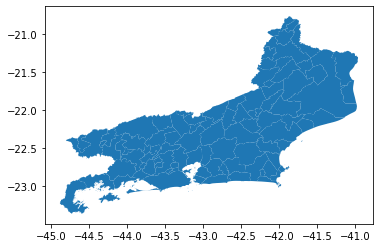

In [5]:
rj.plot()

<AxesSubplot:>

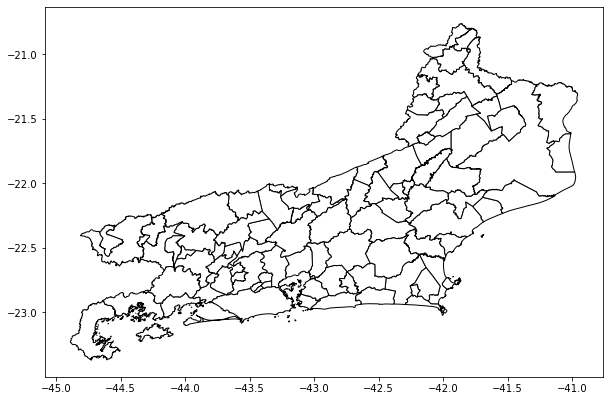

In [6]:
rj.plot(color='w', edgecolor='k', figsize=(10,14))

# Criando Shapefiles

## Modificando o gpd

In [7]:
rj = rj[rj['NM_MUNICIP'] == 'RIO DE JANEIRO']
rj

,ID,CD_GEOCODM,NM_MUNICIP,geometry
67,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


<AxesSubplot:>

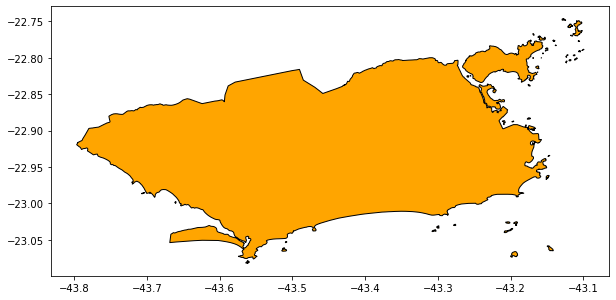

In [11]:
rj.plot(color='orange', edgecolor='k', figsize=(10,14))

In [13]:
dir = 'Dados/Mapas/RJ/RJ_MUNICIO'

In [38]:
if not os.path.exists(dir):
    os.makedirs(dir)

In [39]:
rj.to_file(dir +'/RJ_MUNICIPIO.shp')

In [18]:
rj_municipio = gpd.read_file('Dados/Mapas/RJ/RJ_MUNICIO/RJ_MUNICIPIO.shp')
rj_municipio

,ID,CD_GEOCODM,NM_MUNICIP,geometry
0,1535,3304557,RIO DE JANEIRO,"MULTIPOLYGON (((-43.12376 -22.80712, -43.12380..."


## Transformando df em gdf

In [22]:
dados = pd.read_table('Dados/dados.txt')
dados

,Area,Bairro,Cidade,Endereco,Estado,Latitude,Longitude,Quartos,Suites,Vagas,Tipo,Transacao,Valor
0,138,Recreio dos Bandeirantes,Rio de Janeiro,Rua Vicente Scofano,RJ,-23.016455,-43.462946,3,1,3,Apartamento,Venda,1095000
1,133,Freguesia (Jacarepaguá),Rio de Janeiro,Rua Potiguara,RJ,-22.943199,-43.336911,3,1,2,Apartamento,Venda,650000
2,46,Pilares,Rio de Janeiro,Rua Professor Carneiro Felipe,RJ,-22.873849,-43.300517,1,0,0,Apartamento,Venda,150000
3,65,Barra da Tijuca,Rio de Janeiro,Avenida Salvador Allende,RJ,-22.984787,-43.412703,2,1,1,Apartamento,Venda,430000
4,85,Gávea,Rio de Janeiro,Rua Marquês de São Vicente,RJ,-14.235004,-51.925280,2,1,2,Apartamento,Venda,1800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Campo Grande,Rio de Janeiro,Rua Josué de Barros,RJ,-22.878349,-43.550762,2,0,1,Apartamento,Venda,170000
4996,75,Recreio dos Bandeirantes,Rio de Janeiro,Rua Le Corbusier,RJ,-23.024717,-43.487285,3,1,1,Apartamento,Venda,550000
4997,32,Jardim Botânico,Rio de Janeiro,Rua Getúlio das Neves,RJ,-22.959433,-43.206180,1,0,0,Apartamento,Venda,580000
4998,85,Grajaú,Rio de Janeiro,Rua Jerônimo de Lemos,RJ,-22.918773,-43.260492,3,0,0,Apartamento,Venda,325000


CRS(Coordinate Reference System) é um padrão de escrita para dados de localização.
https://en.wikipedia.org/wiki/Spatial_reference_system

In [28]:
geometry = [Point(x) for x in zip(dados.Longitude, dados.Latitude)]
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}
geo_dados = gpd.GeoDataFrame(dados,crs=crs,geometry=geometry)

In [40]:
dir = 'Dados/Mapas/RJ-DATASET'
if not os.path.exists(dir):
    os.makedirs(dir)
geo_dados.to_file(dir + '/DATASET.shp')

Mais fontes sobre referencias  espaciais e CRS  
https://www.lapig.iesa.ufg.br/lapig/cursos_online/gvsig/a_projeo_utm_no_brasil.html  
 http://www.spatialreference.org/

## Equalizando CRS

In [33]:
rj.crs

{'proj': 'longlat', 'ellps': 'GRS80', 'no_defs': True, 'wktext': True}

In [35]:
geo_dados.crs

{'proj': 'latlong',
 'ellps': 'WGS84',
 'datum': 'WGS84',
 'no_defs': True,
 'wktext': True}

In [36]:
rj = rj.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [37]:
geo_dados = geo_dados.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

# Seleçao de pontos dentro de uma região

In [48]:
in_rj = geo_dados['geometry'].within(rj.iloc[0].geometry)

In [49]:
geo_dados = geo_dados[in_rj]

<AxesSubplot:>

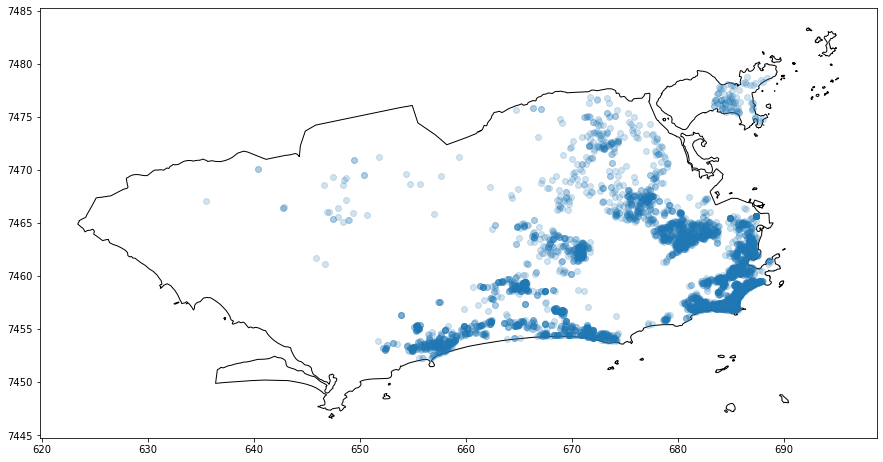

In [52]:
base = rj.plot(color='white', edgecolor='black', figsize=(15,8))
geo_dados.plot(ax=base, figsize=(15,8), alpha=0.2)

In [53]:
geo_dados.to_file(dir + '/DATASET.shp')